# Mini Project 2
Ben Heinze
Braxton McCormack
Michael Hagin

Part 1: Think about the data (BM)

The dataset, "Twitter Interaction Network for the US Congress", holds significant interest due to its exploration of communication patterns and influence among members of the 117th United States Congress. This network, constructed from interactions such as retweets, replies, and mentions on Twitter, offers a unique lens through which to study political dialogue, alliances, and information dissemination within a pivotal legislative body. By analyzing this network, insights into the structural dynamics of political communication, the identification of influential figures, and the understanding of bipartisan and intra-party relationships can be gained, which are crucial for comprehending contemporary legislative processes and strategies.

In preparing the dataset for analysis, a specific pre-processing approach was employed to ensure the integrity and usability of the network data. The code snippet provided outlines the creation of an undirected, unweighted graph from the dataset, with a clear intention to represent straightforward, bidirectional interactions without weighting for frequency or intensity of communication. Notably, the process included the removal of self-loops to eliminate any biases arising from members interacting with their own posts, ensuring a focus on inter-member communication. Additionally, the absence of sampling procedures is justified by the graph's manageable size, allowing for comprehensive analysis without compromising detail or representation. The nodes in the graph are anonymized, represented by numbers instead of identifiable information, to maintain privacy and focus on the structure and patterns of interactions rather than on individual identities.

Considering the pre-processing steps and the dataset's characteristics, expectations regarding the network's properties are as follows. High centrality vertices are anticipated to correspond to Congress members with significant engagement or influence on Twitter, potentially signaling their central roles in information dissemination or political discourse. The decision not to sample, due to the graph's size, supports a comprehensive analysis of the entire Congress' Twitter interaction landscape (at least the ones in this dataset). The degree distribution's adherence to a power law is further anticipated, reflecting a common trait of social networks where a minority of nodes possess a large number of connections. This characteristic would highlight the presence of highly influential or active members within the Congress' Twitter network. Lastly, the graph's small-world property is expected, given the tight-knit nature of such a specific community, where legislative and political commonalities create dense interconnections, despite the network's anonymization and simplification to undirected, unweighted edges.

Here is a direct link to the dataset used: https://snap.stanford.edu/data/congress-twitter.html
If one person did a whole part their initials are at the top of said part but if the work was mixed the initials are above their respective portions of code written (part 2).


In [1]:
import pandas as pd
import networkx as nx
import numpy as np

file_path = 'datasets/congress.edgelist'

G = nx.read_edgelist(file_path, create_using=nx.Graph())

'''
Part 2 implies that our graph should be undirected, unweighted, with no pararell edges or loops.
According to google using networkx graph objects means the pararell edges won't 
matter so the below code removes loops (if there is any)
'''
loops = list(nx.selfloop_edges(G))
G.remove_edges_from(loops)

num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print(f"Graph with {num_nodes} nodes and {num_edges} edges")

Graph with 475 nodes and 10222 edges


Part 2: Write functions for graph analysis in Python

In [2]:
'''BM
4. [5 points] Number of vertices: A function that takes the following input: 
a list of edges representing a graph, where each edge is a pair. 
The output should be the number of vertices. 
'''
def number_of_vertices(edges):
    vertices = set()
    for i in edges:
        vertices.add(i[0])
        vertices.add(i[1])
    print(f"4. Total number of vertices: {len(vertices)}")

'''BH
5. [5 points] Degree of a vertex: A function that takes the following input: a 
list of edges representing a graph, where each edge is a pair, and a vertex 
index that is an integer. The output should be the degree of
the input vertex. 
'''
def degree_of_vertex(edges, vertex_index):
    degree = set()
    for i in edges:
        if (int(i[0]) == vertex_index):
            degree.add(i[1])
        elif (int(i[1]) == vertex_index):
            degree.add(i[0])
    print(f"5. Degree of vertex {vertex_index}: ", len(degree))

'''BH
6. [5 points] Clustering coefficient of a vertex: A function that takes the 
following input: a list of edges representing a graph, where each edge is 
a pair, and a vertex index that is an integer. The output should be
the clustering coefficient of the input vertex.
'''
def clustering_coefficient_of_vertex(edges, vertex_index):
    neighborEdgeList = set()    #edgeList 
    neighborLabels = set()      #just vertices
    #creates a set of every neighbor of a given vertex, and degree of vertex
    for i in edges:
        if (int(i[0]) == vertex_index):
            neighborLabels.add(i[1])
            neighborEdgeList.add(i)
        elif (int(i[1]) == vertex_index):
            neighborLabels.add(i[0])
            neighborEdgeList.add(i)
    # degree of vertex
    kv = len(neighborEdgeList)  
    #removes divide by zero error that can happen if a degree is 1 or less
    if kv <= 1:
        return None
    #number of edges between neighbors of V
    nv = 0  
    for v1 in neighborLabels:
        for v2 in neighborLabels:
            if v1 < v2:
                for edge in edges:
                    if v1 == edge[0] and v2 == edge[1]:
                        nv +=1
                    elif v2 == edge[0] and v1 == edge[1]:
                        nv+=1
    cc_v = (2*nv) / ((kv) * (kv-1))
    print(f"6. Clustering coefficient of vertex {vertex_index}: " ,cc_v)

'''BM
7. [5 points] Betweenness centrality of a vertex: A function that takes the following input: 
a list of edges representing a graph, where each edge is a pair, and a 
vertex index that is an integer. The output should be
the betweenness centrality of the input vertex. 
'''
def betweenness_centrality_of_vertex(edges, vertex_index):
    '''
    Originally this took way to long even for our smallish dataset. 
    Eventully I found this article here: 
    https://snap.stanford.edu/class/cs224w-readings/brandes01centrality.pdf
    about an efficeint way for finding betweenness centrality. 
    The pseudocode they provided on page 10 was easy to 
    convert since python already reads like pseudocode.
    '''
    betweenness = 0
    nodes = G.nodes()
    for s in nodes:
        # Initialize
        S = []
        P = {w: [] for w in nodes}
        g = {w: 0 for w in nodes}
        g[s] = 1
        d = {w: -1 for w in nodes}
        d[s] = 0
        Q = [s]

        # BFS from s
        while Q:
            v = Q.pop(0)
            S.append(v)
            for w in G.neighbors(v):
                # Path discovery
                if d[w] < 0:
                    Q.append(w)
                    d[w] = d[v] + 1
                # Path counting
                if d[w] == d[v] + 1:
                    g[w] += g[v]
                    P[w].append(v)

        # Accumulation
        delta = {w: 0 for w in nodes}
        while S:
            w = S.pop()
            coeff = (1 + delta[w]) / g[w]
            for v in P[w]:
                delta[v] += g[v] * coeff
            if w != s and w == vertex_index:
                betweenness += delta[w]

    betweenness /= 2  # Since each shortest path is considered twice
    betweennessCentrality = betweenness

    print(f"7. Betweenness Centrality of Vertex {vertex_index}: {betweennessCentrality} ")

'''BH
8. [5 points] Average shortest path length: A function that takes the following input: a list of edges
representing a graph, where each edge is a pair. The output should be the average shortest path length of
the graph.
'''
def average_shortest_path_length(edges):
    #reconstruct graph from edgelist
    G = nx.Graph()
    for edge in edges:
        G.add_edge(edge[0], edge[1])

    #calculate average
    avg = 0
    for s in G.nodes():
        for t in G.nodes():
            if s != t:
                avg += ( (nx.shortest_path_length(G, s, t)) / (len(G)*(len(G)-1)) )   
    print(f"8. Average shortest Path Length: {avg}")

'''BH
9. [5 points] Adjacency matrix. A function that takes the following input: a list of edges representing a
graph, where each edge is a pair. The output should be the dense adjacency matrix of the graph.
'''
# np.set_printoptions(threshold=np.inf)  # This would  prevent the adjacenty adjacency_matrix
#from being small. It is commented out because it adds 20+ pages of data
def adjacency_matrix(edges):
    s = set()
    # print(edges)
    #get number of nodes:
    for edge in edges:
        s.add(edge[0])
        s.add(edge[1])
    #creates NxN matrix
    adj = np.empty((len(s), len(s)))
    #fills matrix
    for edge in edges:
        row = edge[0]
        col = edge[1]
        adj[int(row)][int(col)] = 1

    print("9. Adjacency Matrix:")
    print(adj)
    
'''BH
10. [5 points EXTRA CREDIT] Implement power iteration to find the eigenvector centrality of each node
in a network: Write a function that takes as input an adjacency matrix, and outputs the eigenvector
corresponding to the dominant eigenvector of that matrix (the eigenvector corresponding to the largest
eigenvalue). The output can be used to view the eigenvector centrality of each vertex, when the input is a
transposed adjacency matrix. This function must implement power iteration. You may not use linear
algebra functions in numpy, spicy, or any other library to find eigenvectors/values, but you may use linear
algebra functions for matrix-vector multiplication, computing the dot product, the norm. You may also use
a function that implements argmax.

'''
def eigenvector_centrality(adjacency_matrix):
    # Generate the adjacency matrix from the graph
    adjacency_matrix = nx.to_numpy_array(G)
    
    # Initialize variables for power iteration
    n = adjacency_matrix.shape[0]  # Number of nodes
    x = np.ones(n)  # Initial vector of 1's
    
    # Power iteration to find the dominant eigenvector
    for _ in range(100):  # Limit the number of iterations to 100 for simplicity
        x_new = np.dot(adjacency_matrix, x)  # Perform matrix-vector multiplication
        x_new_norm = np.linalg.norm(x_new)  # Compute the norm of the new vector
        x_new /= x_new_norm  # Normalize the vector
        
        # Check for convergence
        if np.linalg.norm(x - x_new) < n * 1e-6:
            break  # Convergence achieved
        x = x_new  # Update the vector for the next iteration
    
    print(f"10. adjacency matrix: {x}")

number_of_vertices(G.edges())   #4
degree_of_vertex(G.edges(), 42)    #5
clustering_coefficient_of_vertex(G.edges(), 260)    #6
betweenness_centrality_of_vertex(G.edges, '17')     #7
average_shortest_path_length(G.edges())     #8
adjacency_matrix(G.edges)    #9
eigenvector_centrality(adjacency_matrix) #10

4. Total number of vertices: 475
5. Degree of vertex 42:  26
6. Clustering coefficient of vertex 260:  0.5246305418719212
7. Betweenness Centrality of Vertex 17: 1669.7516258719183 
8. Average shortest Path Length: 2.0638862980201704
9. Adjacency Matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
10. adjacency matrix: [0.00364715 0.00341167 0.03300536 0.00267616 0.00814558 0.01869448
 0.0119816  0.01050659 0.00745046 0.0053786  0.0047445  0.0112344
 0.00491191 0.00460985 0.0059643  0.01319505 0.01749099 0.00396768
 0.01204324 0.01458718 0.02568541 0.01011256 0.00423366 0.03098992
 0.00894723 0.00697453 0.00588791 0.00606673 0.01176773 0.00375543
 0.02118614 0.01764545 0.01555478 0.02071172 0.00793459 0.01487374
 0.00399015 0.00635005 0.01388869 0.00721522 0.00907357 0.01876595
 0.00938472 0.01132669 0.00923646 0.00450255 0.01857611 0.00375888
 0.00783881 0.0172048  0.0402531

Note, the adjacency matrix output in #9 is simplifed and from this simplified data it is difficult to show that we don't have an array of just 0's. Because of this I have attached a link to our github repository where I have a .txt file of the whole thing. It is very long.
https://github.com/Ben-Heinze/CSCI-347-Datamining/blob/main/mini_project_2/Adjacency%20Matrix%20Full.txt

Part 3: Analyze the graph data (MH)

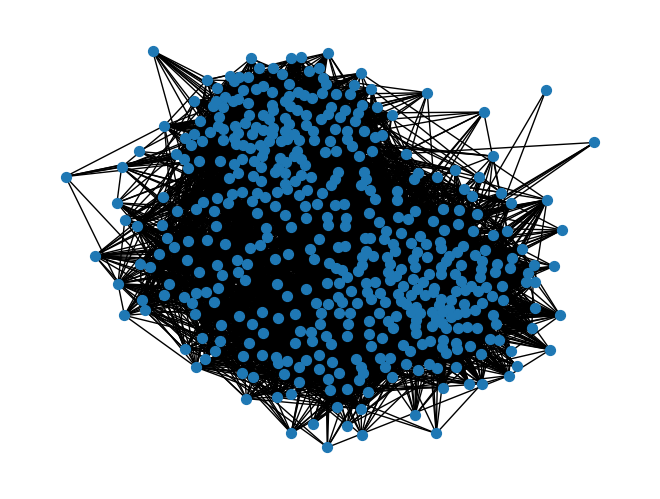

In [3]:
'''
Part 3

Question 11
'''
nx.draw(G, node_size=50)

In [4]:
'''
Question 12
'''

print("10 nodes with the highest degree: \n")
for i in G:                       # for every item in G, if it's above a certain
    if (G.degree[i] - 110) > 0:   # threshold, print the node and degree
        print("Node number " + i, "has a degree of", G.degree[i])

10 nodes with the highest degree: 

Node number 254 has a degree of 142
Node number 111 has a degree of 120
Node number 393 has a degree of 129
Node number 190 has a degree of 127
Node number 367 has a degree of 214
Node number 192 has a degree of 113
Node number 322 has a degree of 181
Node number 269 has a degree of 112
Node number 208 has a degree of 134
Node number 385 has a degree of 111


In [5]:
'''
Question 13
'''

print("10 nodes with the highest betweeness centrality: \n")
x = nx.betweenness_centrality(G)
for i in x:                        # for every item in G above a certain threshold,
    if x[i] > 0.0130:              # print the node and betweenness centrality
        print("Node " + i, "has a betweennes centrality of",  x[i])



10 nodes with the highest betweeness centrality: 

Node 17 has a betweennes centrality of 0.014895064503188359
Node 254 has a betweennes centrality of 0.022622535590667927
Node 71 has a betweennes centrality of 0.01377085766816814
Node 393 has a betweennes centrality of 0.013559463845965472
Node 190 has a betweennes centrality of 0.01304835098949867
Node 367 has a betweennes centrality of 0.06862644524670267
Node 92 has a betweennes centrality of 0.013185269844357143
Node 461 has a betweennes centrality of 0.013285379463926878
Node 322 has a betweennes centrality of 0.03718289232722759
Node 208 has a betweennes centrality of 0.01545860745624782


In [6]:
'''
Question 14
'''
print("10 nodes with the highest clustering coefficient (no ties): \n")
x = nx.clustering(G)
for i in x:                        # for every item in G above a certain threshold,
    if x[i] > 0.52:                # print the node and clustering coefficient
        print("Node " + i, "has a clustering coefficient of",  x[i])


10 nodes with the highest clustering coefficient (no ties): 

Node 260 has a clustering coefficient of 0.5246305418719212
Node 101 has a clustering coefficient of 0.5252525252525253
Node 241 has a clustering coefficient of 0.5238095238095238
Node 131 has a clustering coefficient of 0.525
Node 159 has a clustering coefficient of 0.5358974358974359
Node 337 has a clustering coefficient of 0.5645645645645646
Node 228 has a clustering coefficient of 0.580952380952381
Node 206 has a clustering coefficient of 0.5287356321839081
Node 158 has a clustering coefficient of 0.5907692307692308
Node 227 has a clustering coefficient of 0.5824175824175825


In [7]:
'''
Question 15
'''

print("10 nodes with the highest eigenvector centrality: \n")
x = nx.eigenvector_centrality(G)
for i in x:
    if x[i] > 0.095:
        print("Node " + i, "has an eigenvector centrality of",  x[i])

10 nodes with the highest eigenvector centrality: 

Node 254 has an eigenvector centrality of 0.12163375711583706
Node 111 has an eigenvector centrality of 0.10782079735109976
Node 393 has an eigenvector centrality of 0.1116015311639707
Node 190 has an eigenvector centrality of 0.1049903521264594
Node 367 has an eigenvector centrality of 0.1874548636669971
Node 92 has an eigenvector centrality of 0.09553476874991108
Node 461 has an eigenvector centrality of 0.10160701007549314
Node 322 has an eigenvector centrality of 0.14685452461691043
Node 269 has an eigenvector centrality of 0.09812027110779005
Node 208 has an eigenvector centrality of 0.11016963834188911


In [8]:
'''
Question 16
'''

print("10 nodes with the highest Pagerank: \n")
x = nx.pagerank(G)
for i in x:                     # for every node above a certain threshold,
    if x[i] > .005:             # print the node and the Pagerank
        print("Node " + i, "has a Pagerank of",  x[i])

10 nodes with the highest Pagerank: 

Node 393 has a Pagerank of 0.0064796415848055134
Node 335 has a Pagerank of 0.005371910416990585
Node 389 has a Pagerank of 0.005398301251486948
Node 367 has a Pagerank of 0.006651882865207782
Node 192 has a Pagerank of 0.005218096783465587
Node 322 has a Pagerank of 0.012032354694664725
Node 269 has a Pagerank of 0.0061335255389171756
Node 399 has a Pagerank of 0.006738392448969913
Node 208 has a Pagerank of 0.006710563125799518
Node 436 has a Pagerank of 0.005223949724570414


Question 17

The highly ranked nodes aren't mostly the same, but there are multiple nodes which are in the top 10 of one category that are also in the top 10 of another category. For example, nodes 393, 111, 208, 192, and 92 are some of these nodes. The biggest differences in the rankings are 111-214 in the degree ranking, 0.013-0.069 in the betweenness centrality ranking, 0.524-0.591 in the clustering coefficient ranking, 0.098-0.187 in the eigenvector centrality ranking, and 0.005-0.012 in the Pagerank ranking. Generally, it seems like there are pretty significant differences between the top and bottom of the ranking list, with the exception of the clustering coefficient ranking, where there was a ~13% increase from top to bottom, where the rest of the rankings were almost double at the lowest. I think this is the case because of Small-World Behavior, where many nodes in a set have fewer edges, and a much smaller portion of nodes (hubs) have many edges that connect to multiple clusters of nodes.


In [9]:
'''
Question 18
'''
print("Based on the result of", nx.average_shortest_path_length(G), "when computing the average shortest path length in the graph, this graph\ndoes exhibit small-world behavior")


Based on the result of 2.0638862980235397 when computing the average shortest path length in the graph, this graph
does exhibit small-world behavior


This graph does not seem to exhibit power law behavior


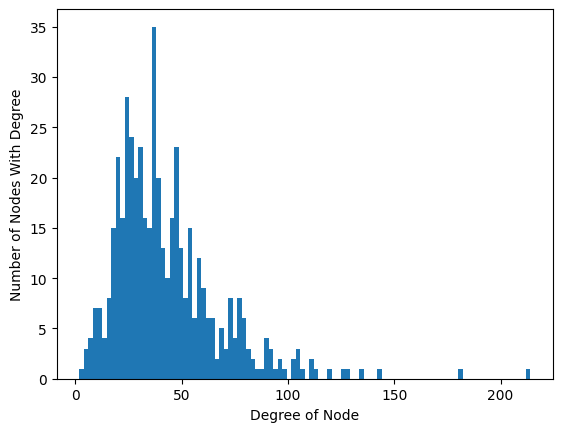

In [10]:
'''
Question 19
'''
import matplotlib.pyplot as plt           # import matplotlib to create a histogram
dict_degrees = dict(nx.degree(G))         # set x and y values
degree_vals = dict_degrees.values()       
degree_vals_vtx = dict_degrees.keys()
degvals = plt.hist(degree_vals, bins=100) # plot the histogram
plt.xlabel("Degree of Node")              # label x and y axes
plt.ylabel("Number of Nodes With Degree")

print("This graph does not seem to exhibit power law behavior")